<a href="https://colab.research.google.com/github/Alok1721/opencv/blob/main/find_angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy
from google.colab.patches import cv2_imshow


In [2]:
img=cv2.imread("image1.jpg")
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(g_img, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)





array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

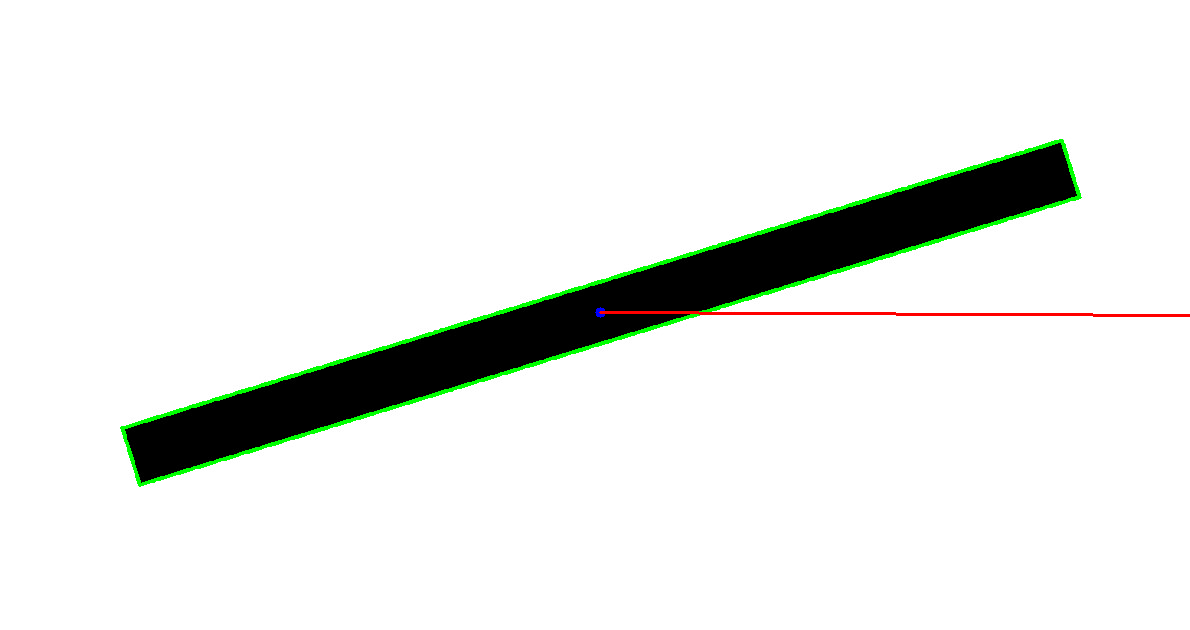

In [3]:
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)
height, width, _ = img.shape
cv2.line(img, (cX, cY), (width, height//2), (0, 0, 255), 2)


cv2_imshow(img)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()


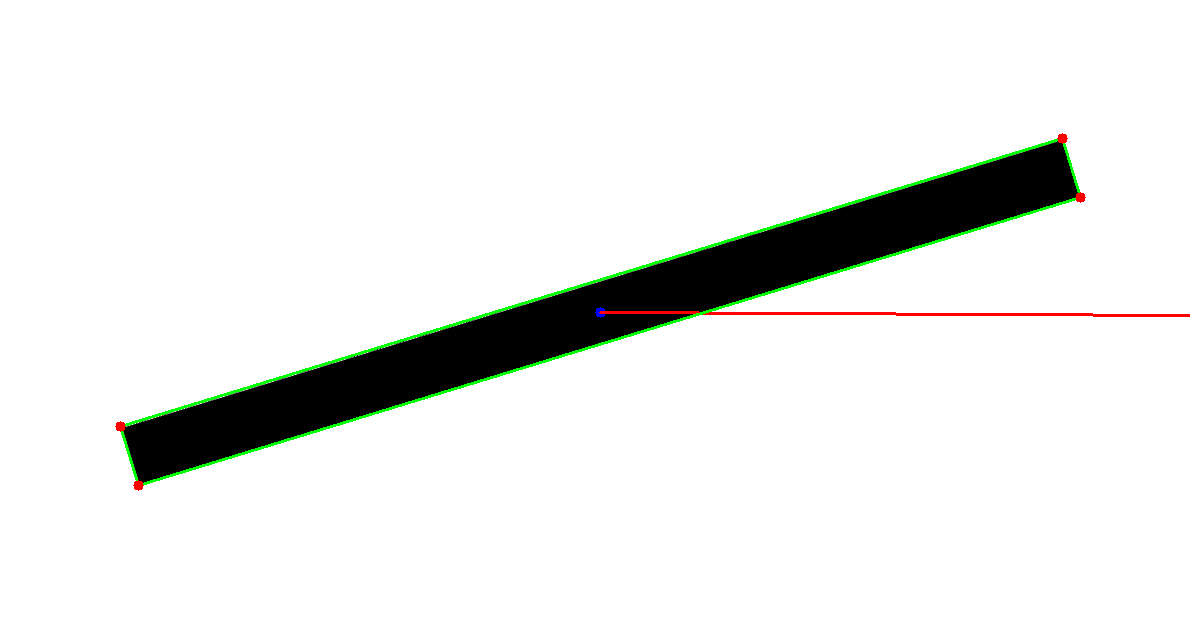

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("image1.jpg")
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(g_img, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)
height, width, _ = img.shape
cv2.line(img, (cX, cY), (width, height//2), (0, 0, 255), 2)


# Iterate over contours and find minimum area rectangle
for contour in contours:
    # Get the minimum area rectangle
    rect = cv2.minAreaRect(contour)

    # Convert rectangle to box (four corners)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the box (rectangle) around the contour
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)

    # Draw red circles at the four corners of the rectangle
    for point in box:
        cv2.circle(img, tuple(point), 5, (0, 0, 255), -1)

# Display the image with the rectangle and corner circles
cv2_imshow(img)
key = cv2.waitKey(0)

if key == ord('q'):
    cv2.destroyAllWindows()


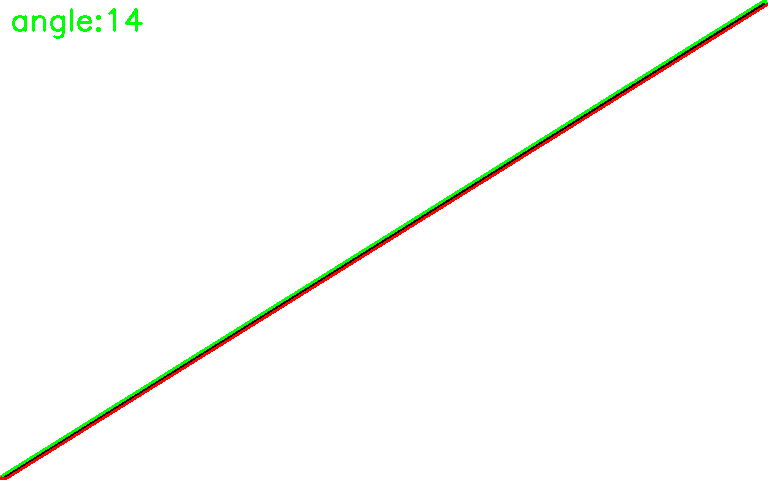

In [19]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

img = cv2.imread("Test.png")
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(g_img, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over contours and find minimum area rectangle
for contour in contours:
    # Get the minimum area rectangle
    rect = cv2.minAreaRect(contour)

    # Convert rectangle to box (four corners)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the box (rectangle) around the contour
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)

    # Draw a red circle only at the bottom-right corner of the rectangle
    bottom_right_point = tuple(box[3])
    top_right_point=tuple(box[2])
    h, w, _ = img.shape
    cv2.circle(img, bottom_right_point, 5, (0, 0, 255), -1)
    cv2.line(img,top_right_point,bottom_right_point,(0,0,255),2)
    x_b, y_b = bottom_right_point
    x_t, y_t =top_right_point
# cv2.line(img,bottom_right_point,(width,y_coordinate),(0,0,255),2)
vector1=(x_t-int(w/2),y_t-int(h/2))
vector2=(int(w)-x_b,int(h/2)-y_b)
angle_radians = math.atan2(vector2[1], vector2[0]) - math.atan2(vector1[1], vector1[0])
angle_degrees = math.degrees(angle_radians)
angle_degrees = (angle_degrees + 360) % 360

# angle_rad = np.arctan2(top_right_point[1]-bottom_right_point[1] , width - top_right_point[0])
# angle_deg = np.degrees(angle_rad)


cv2.putText(img, "angle:"+str(int(angle_degrees)), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


# Display the image with the rectangle and the bottom-right corner circle
cv2_imshow(img)
key = cv2.waitKey(0)

if key == ord('q'):
    cv2.destroyAllWindows()



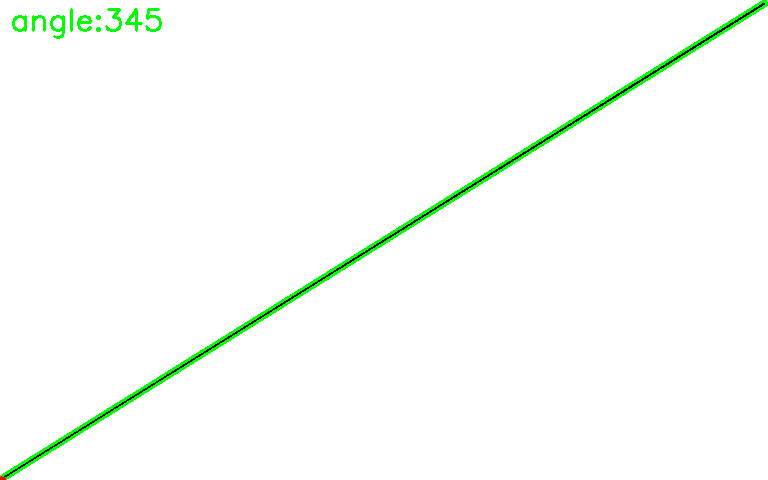

In [21]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

img = cv2.imread("Test.png")
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(g_img, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over contours and find minimum area rectangle
for contour in contours:
    # Get the minimum area rectangle
    rect = cv2.minAreaRect(contour)

    # Convert rectangle to box (four corners)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the box (rectangle) around the contour
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)

    # Draw a red circle only at the bottom-right corner of the rectangle
    bottom_right_point = tuple(box[3])
    top_right_point = tuple(box[2])
    h, w, _ = img.shape
    cv2.circle(img, bottom_right_point, 5, (0, 0, 255), -1)

    x_b, y_b = bottom_right_point
    x_t, y_t = top_right_point

    vector1 = (x_t - int(w/2), y_t - int(h/2))
    vector2 = (int(w) - x_b, int(h/2) - y_b)

    # Calculate the angle from horizontal
    angle_radians = math.atan2(vector1[1], vector1[0]) - math.atan2(vector2[1], vector2[0])
    angle_degrees = math.degrees(angle_radians)
    angle_degrees = (angle_degrees ) % 360

    cv2.putText(img, "angle:" + str(int(angle_degrees)), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the image with the rectangle and the bottom-right corner circle
cv2_imshow(img)
key = cv2.waitKey(0)

if key == ord('q'):
    cv2.destroyAllWindows()
